<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Імпорт модулів

In [1]:
import torch
import numpy as np

# Завдання 1

Перегляньте інформацію про доступні процесори, та виведіть про них інформацію

In [ ]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)

False
cpu


# Завдання 2
Підключіть colab до процесора GPU, та знову виведіть інформацію про доступні процесори

In [ ]:
print(torch.cuda.is_available())  # True/False

if torch.cuda.is_available():
    print(torch.cuda.device_count())  # Кількість GPU
    print(torch.cuda.get_device_name(0))  # Назва першого GPU

tensor = torch.tensor([1, 2, 3])
print(tensor.device)

True
1
Tesla T4
cpu


# Завдання 3
Створіть випадковий тензор розміру (2, 3). Виведіть інформацію про його:

* розмір
* тип даних
* процесор
* наявність градієнта

In [ ]:
tensor = torch.randn(2, 3)
print(f"tensor.shape = {tensor.shape}")
print(f"tensor.dtype = {tensor.dtype}")
print(f"tensor.device = {tensor.device}")
print(f"tensor.requires_grad = {tensor.requires_grad}")

tensor.shape = torch.Size([2, 3])
tensor.dtype = torch.float32
tensor.device = cpu
tensor.requires_grad = False


# Завдання 4

Створіть 2 тензора розміру 100. Використовуючи лише модуль `torch` обрахуйте середьню абсолютну похибку(mae) між ними. Виведіть результат як число

In [ ]:
tensor_a = torch.randn(100)
tensor_b = torch.randn(100)
mae = torch.mean(torch.abs(tensor_a - tensor_b))
mae.item()

1.1602232456207275

# Завдання 5

Створіть 3 випадкових тензора з розмірами:
* 32х28х28
* 16х28х28
* 64х28х28

Об'єднайте їх по першій розмірності. Результат має мати розмір 112х28х28

In [ ]:
tensor_c = torch.randn(32, 28, 28)
tensor_d = torch.randn(16, 28, 28)
tensor_e = torch.randn(64, 28, 28)
tensor_f = torch.cat((tensor_c, tensor_d, tensor_e), dim=0)
tensor_f.shape

torch.Size([112, 28, 28])

# Завдання 6
Застосуйте метод градієнтного спуску для функції

In [16]:
def f(x):
  return x**2/3 + torch.sin(torch.pi*x)

device = "cuda" if torch.cuda.is_available() else "cpu"
torch.set_default_device(device)

# вибираємо початкове значення
x = torch.tensor(-2.0, requires_grad=True)
learning_rate = 1e-1

# ініціалізація моменту
moment = torch.tensor(0.0)
beta = 0.99

for t in range(2000):
    # обчислюємо функцію яку потрібно мінімізувати
    loss = f(x)

    # обчислюємо всі потрібні градієнти
    loss.backward()

    # вивід значення функції
    if t % 100 == 0:
      print(f'{loss.item()=}')

    # градієнтний спуск
    with torch.no_grad():
      moment = beta*moment + learning_rate*x.grad
      x -= moment

      # очищуємо пам'ять для повторного обчислення градієнтів
      x.grad = None

loss.item()=1.3333332538604736
loss.item()=1.0998700857162476
loss.item()=0.9519016742706299
loss.item()=0.9664866328239441
loss.item()=0.956887423992157
loss.item()=0.951842188835144
loss.item()=0.949904203414917
loss.item()=0.9491893649101257
loss.item()=0.9489274024963379
loss.item()=0.9488317966461182
loss.item()=0.9487969279289246
loss.item()=0.9487841725349426
loss.item()=0.9487794637680054
loss.item()=0.9487776756286621
loss.item()=0.9487771987915039
loss.item()=0.9487768411636353
loss.item()=0.94877690076828
loss.item()=0.9487766623497009
loss.item()=0.9487766623497009
loss.item()=0.9487766027450562


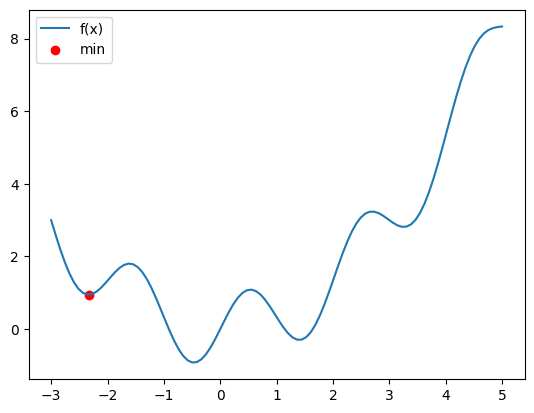

In [17]:
import matplotlib.pyplot as plt

xs = torch.linspace(-3, 5, 100)
plt.plot(xs.cpu(), f(xs).cpu(), label='f(x)')
plt.scatter(x.item(), f(x).item(), c='red', label='min')
plt.legend()

In [18]:
x

tensor(-2.3350, device='cuda:0', requires_grad=True)

In [13]:
!pip install -q torchviz

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.0 MB/s eta 0:00:00


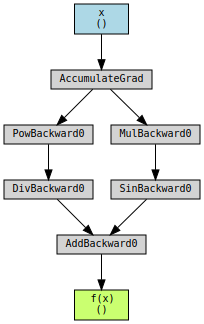

In [ ]:
from torchviz import make_dot
loss = f(x)

dot = make_dot(loss, params={'x': x, 'f(x)': loss})
dot

# Завдання 7
Застосуйте метод градієнтного спуску для функції. Мінімум функції рівний 0

In [19]:
def f1(x, y):
  # функція Швефеля
  return  418.9829*2 - x*torch.sin(x.abs().sqrt()) - y*torch.sin(y.abs().sqrt())

def f2(x, y):
  # трьохгорбна функція
  return 2*x**2  - 1.05*x**4 + 1/6*x**6 + x*y  + y**2

def f3(x, y):
  # функція птах
  return 106.7645 + torch.sin(x)*torch.exp((1-torch.cos(y))**2) + \
  torch.cos(y)*torch.exp((1-torch.sin(x))**2) + \
  (x-y)**2

In [301]:
def fun_min(f, x, y):
  # вибираємо початкове значення

  learning_rate = 1e-1

  # ініціалізація моменту
  moment_x = torch.tensor(0.0)
  moment_y = torch.tensor(0.0)
  beta = 0.99

  for t in range(2000):
      # обчислюємо функцію яку потрібно мінімізувати
      loss = f(x, y)

      # обчислюємо всі потрібні градієнти
      loss.backward()

      # вивід значення функції
      if t % 100 == 0:
        print(f'{loss.item()=}')

      # градієнтний спуск
      with torch.no_grad():
        moment_x = beta*moment + learning_rate*x.grad
        moment_y = beta*moment + learning_rate*y.grad
        x -= moment_x
        y -= moment_y

        # очищуємо пам'ять для повторного обчислення градієнтів
        x.grad = None
        y.grad = None

In [306]:
def print_plot(fun, x, y):
    xs = torch.linspace(-1000, 1000, 50)
    ys = torch.linspace(-1000, 1000, 50)
    res = fun(xs, ys)

    # Перетворюємо тензори на NumPy масиви за допомогою .detach().numpy()
    xs_np = xs.detach().cpu().numpy()
    ys_np = ys.detach().cpu().numpy()

    plt.plot(xs_np, res.detach().cpu().numpy(), label='f(x, y)')

    # Перетворюємо x і fun(x, y) на NumPy масиви за допомогою .detach().numpy()
    x_np = x.detach().cpu().numpy()
    y_np = y.detach().cpu().numpy()
    res_min = fun(x, y).detach().cpu().numpy()

    plt.scatter(x_np, res_min, c='red', label='min')
    plt.legend()
    plt.show()


In [302]:
x = torch.tensor(-1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
fun_min(f1, x, y)


loss.item()=837.9658203125
loss.item()=830.0913696289062
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125
loss.item()=830.0751953125


In [303]:
x

tensor(5.2392, device='cuda:0', requires_grad=True)

In [304]:
y

tensor(5.2392, device='cuda:0', requires_grad=True)

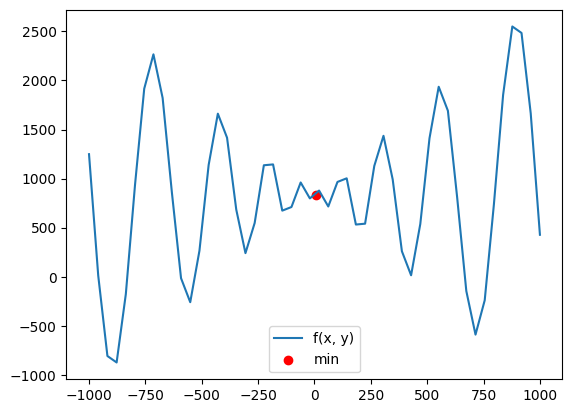

In [307]:
print_plot(f1, x, y)

In [289]:
x = torch.tensor(1., requires_grad=True)
y = torch.tensor(1., requires_grad=True)
fun_min(f2, x, y)

loss.item()=3.116666793823242
loss.item()=2.0328073501586914
loss.item()=1.1838648319244385
loss.item()=0.601528525352478
loss.item()=0.27931708097457886
loss.item()=0.12627013027668
loss.item()=0.05819103866815567
loss.item()=0.028182215988636017
loss.item()=0.014634746126830578
loss.item()=0.008222654461860657
loss.item()=0.004980545490980148
loss.item()=0.0032087608706206083
loss.item()=0.0021618164610117674
loss.item()=0.0015000291168689728
loss.item()=0.0010598516091704369
loss.item()=0.000756759662181139
loss.item()=0.0005434587365016341
loss.item()=0.00039138615829870105
loss.item()=0.00028216652572155
loss.item()=0.00020341709023341537


In [290]:
x

tensor(-0.0053, device='cuda:0', requires_grad=True)

In [291]:
y

tensor(0.0125, device='cuda:0', requires_grad=True)

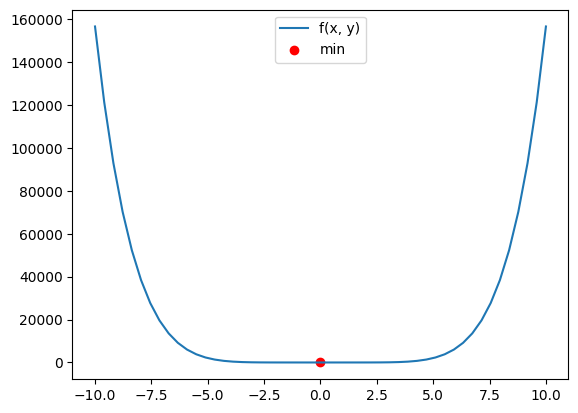

In [292]:
print_plot(f2, x, y)

In [293]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(1.0, requires_grad=True)
fun_min(f3, x, y)

loss.item()=108.3580322265625
loss.item()=108.32971954345703
loss.item()=108.30878448486328
loss.item()=108.2930908203125
loss.item()=108.2813949584961
loss.item()=108.27275848388672
loss.item()=108.2664794921875
loss.item()=108.26197052001953
loss.item()=108.25877380371094
loss.item()=108.25653076171875
loss.item()=108.25496673583984
loss.item()=108.25387573242188
loss.item()=108.25313568115234
loss.item()=108.25261688232422
loss.item()=108.25226593017578
loss.item()=108.25202941894531
loss.item()=108.25186920166016
loss.item()=108.25175476074219
loss.item()=108.25167846679688
loss.item()=108.25161743164062


In [294]:
x

tensor(0.6716, device='cuda:0', requires_grad=True)

In [295]:
y

tensor(0.9111, device='cuda:0', requires_grad=True)

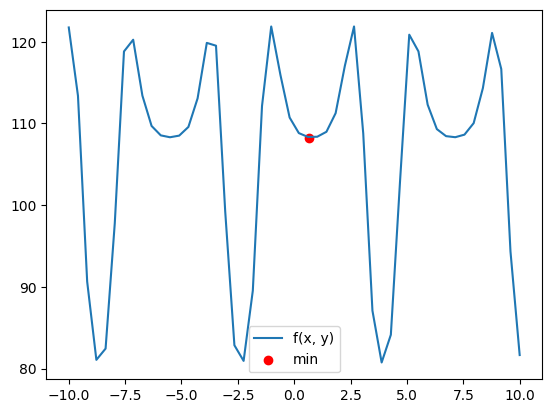

In [296]:
print_plot(f3, x, y)